## Homework 3
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
### Due - 11/06/2020 - 11:59p - 20 points

**Name:** `<Patrick Brennan>`

**Email** `<Pbrennan@scu.edu>`

**Objectives:** 
* Implement and understand multi-class classifier using MLP
* Familiarity with `Keras`

**Submission Instructions:** 
* Please download `hw3.ipynb`, `train_nn.csv`, and `test_nn.csv` files and insert cells in the `hw3.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw3`.
* Please make sure you type your `Name` and `Email` on top of your submission file in the placeholder above. 

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

### Problem Statement
You are given a dataset of different `Iris` flower species. The original [dataset](https://archive.ics.uci.edu/ml/datasets/iris) has detailed description of all the characteristics of the flowers. Please feel free to visit the original page to know more about the dataset. Your task is to develop a Neural Network based multi-class classifier using `Keras` to categorize the flowers based on their species. 

**Guide**: Feel free to use `week6-keras-diabetes.ipynb` as a sample to kick-start your implentation. If you simply try to copy and paste the code into your homework, trust me, it won't work!!! 

Here are few things you can try:
* *One hot encoding*: There are three `species` of iris flower in your dataset. This time, you have to classify your data into `three` different categories. For that you need to compute `one hot encoding`.
* *Activation functions*: There are different activation functions used in Neural Network (NN). Your task is to research different activation functions such as SoftMax, ReLu, and Sigmoid, and learn which ones are suitable for which layers of your neural network. Based on that, design your NN architecture and check the performance by computing `accuracy`.
* *Number of hidden layers*: Instead on using one hidden layer, you can try two and check out your results and check the performance by computing `accuracy`.
* *Loss functions*: Keras comes with different  `loss` functions. Your task is to review them and pick any two to report your findings.

**Adaptation**: We have provided you with the original dataset splitting it into two, one for training and the other for testing. You can use `train_nn.csv` to train the parameters of your model and then use `test_nn.csv` to test your model.

**Note**: Please make sure you have proper comments and explanation/justification of the steps you have coded. Please feel to add extra cells to complete all the `TODO` stubs. You are allowed to create your own utility functions to support your code.

In [ ]:
# importing the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
# TODO - feel free to add more as you need!
%matplotlib inline

In [ ]:
'Loading the train Iris dataset'
from google.colab import files 
files.upload() 
# Define headers since the dataset does not have any headers
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# reading the training data into the data frame
train_df = pd.read_csv('train_NN.csv', header=None, names=col_names)
# reading the test data into the data frame

Saving train_NN.csv to train_NN (3).csv


In [ ]:
# reading the test data into the data frame
from google.colab import files 
files.upload() 
test_df = pd.read_csv('test_NN.csv', header=None, names=col_names)
test_df.head()

Saving test_NN.csv to test_NN (1).csv


,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.1,1.5,0.1,Iris-setosa
2,4.4,3.0,1.3,0.2,Iris-setosa
3,5.1,3.4,1.5,0.2,Iris-setosa
4,5.0,3.5,1.3,0.3,Iris-setosa
5,4.5,2.3,1.3,0.3,Iris-setosa


In [ ]:
'Perform One Hot Encoding for the classifier to work'
# TODO
ds = train_df.values
X = ds[:,0:4].astype(float)
Y = ds[:,4]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
new_y = np_utils.to_categorical(encoded_Y)

In [ ]:
'Assigning features and output columns and converting them into numpy arrays'
# this is upto you.
# you can do it in your way
# TODO (optional)
df_labels = train_df['species']
df_features = train_df.drop('species', 1)
data = np.array(df_features)
new_y = np.array(new_y)
print(data.shape,new_y.shape)

x_train, x_test, y_train, y_test = train_test_split(data, new_y, test_size=0.2, random_state=42)
x_train.shape

((112, 4), (112, 3))


(89, 4)

In [ ]:
# Printing the dimensions of your train, and test data
# TODO
print(train_df.ndim)
print(test_df.ndim)
print(train_df.shape)
print(test_df.shape)

2
2
(112, 5)
(38, 5)


In [ ]:
'Defining the model'
# TODO
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

'Train your model...'
'Store the cost (or loss), so that you can use it to plot the graph'
# You might want to check out this: https://keras.io/callbacks/#create-a-callback
# TODO

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_test, y_test))

Train on 89 samples, validate on 23 samples
Epoch 1/1000
89/89 [==============================] - 0s 912us/step - loss: 0.3257 - accuracy: 0.3034 - val_loss: 0.2830 - val_accuracy: 0.4348
Epoch 2/1000
89/89 [==============================] - 0s 96us/step - loss: 0.3200 - accuracy: 0.3034 - val_loss: 0.2820 - val_accuracy: 0.4348
Epoch 3/1000
89/89 [==============================] - 0s 80us/step - loss: 0.3152 - accuracy: 0.3034 - val_loss: 0.2812 - val_accuracy: 0.4348
Epoch 4/1000
89/89 [==============================] - 0s 73us/step - loss: 0.3098 - accuracy: 0.3034 - val_loss: 0.2806 - val_accuracy: 0.4348
Epoch 5/1000
89/89 [==============================] - 0s 80us/step - loss: 0.3046 - accuracy: 0.3034 - val_loss: 0.2802 - val_accuracy: 0.4348
Epoch 6/1000
89/89 [==============================] - 0s 73us/step - loss: 0.2993 - accuracy: 0.3034 - val_loss: 0.2801 - val_accuracy: 0.4348
Epoch 7/1000
89/89 [==============================] - 0s 90us/step - loss: 0.2944 - accuracy: 0.3

Text(0,0.5,'Loss')

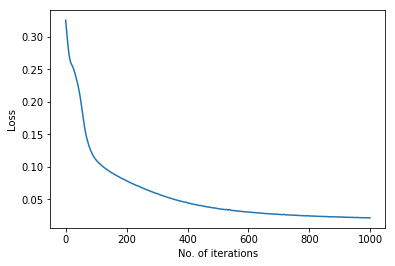

In [ ]:
'Plot loss'
# TODO

# A sample code is provided below. 
plt.plot(history.history['loss'])
plt.xlabel("No. of iterations")
plt.ylabel("Loss")

In [ ]:
'Test the neural network'
# Here you have to find out predicted output for every data from your test dataset
# TODO
yhat = model.predict_classes(X)
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [ ]:
# You can print your actual y from test and predicted y using test
# you might have to check the dimensions of each to make sure you can compare them later
# TODO

for i in range(X.size):
  print(X[i], yhat[i])

(array([5.1, 3.5, 1.4, 0.2]), 0)
(array([4.9, 3. , 1.4, 0.2]), 0)
(array([4.7, 3.2, 1.3, 0.2]), 0)
(array([4.6, 3.1, 1.5, 0.2]), 0)
(array([5. , 3.6, 1.4, 0.2]), 0)
(array([5.4, 3.9, 1.7, 0.4]), 0)
(array([4.6, 3.4, 1.4, 0.3]), 0)
(array([5. , 3.4, 1.5, 0.2]), 0)
(array([4.4, 2.9, 1.4, 0.2]), 0)
(array([4.9, 3.1, 1.5, 0.1]), 0)
(array([5.4, 3.7, 1.5, 0.2]), 0)
(array([4.8, 3.4, 1.6, 0.2]), 0)
(array([4.8, 3. , 1.4, 0.1]), 0)
(array([4.3, 3. , 1.1, 0.1]), 0)
(array([5.8, 4. , 1.2, 0.2]), 0)
(array([5.7, 4.4, 1.5, 0.4]), 0)
(array([5.4, 3.9, 1.3, 0.4]), 0)
(array([5.1, 3.5, 1.4, 0.3]), 0)
(array([5.7, 3.8, 1.7, 0.3]), 0)
(array([5.1, 3.8, 1.5, 0.3]), 0)
(array([5.4, 3.4, 1.7, 0.2]), 0)
(array([5.1, 3.7, 1.5, 0.4]), 0)
(array([4.6, 3.6, 1. , 0.2]), 0)
(array([5.1, 3.3, 1.7, 0.5]), 0)
(array([4.8, 3.4, 1.9, 0.2]), 0)
(array([5. , 3. , 1.6, 0.2]), 0)
(array([5. , 3.4, 1.6, 0.4]), 0)
(array([5.2, 3.5, 1.5, 0.2]), 0)
(array([5.2, 3.4, 1.4, 0.2]), 0)
(array([4.7, 3.2, 1.6, 0.2]), 0)
(array([4.

IndexError: ignored